In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [12]:
data = pd.read_csv("EDA_bondora.csv")

In [13]:
data.head(3)

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromFamilyAllowance,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,RecoveryStage,Restructured,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,good/bad
0,0,0,319.5583,False,7/25/2009,9/24/2009,9/24/2009,9/24/2009,Income unverified - Cross checked,Estonian,20,Male,EE,319.5582,319.56,40.0,1,0.0,HELSINKI,Business,Vocational education,Single,Fully employed,Info and telecom,Homeless,7500.0,0.0,0,19000.0,26500.0,0,0.0,0,0.0,0.0,24,Recovery,False,NaN,NaN,8.94,0.0,310.62,1593.30,4,1252.669,1328.5625,0,NaN,NaN,0
1,0,0,319.5580,True,7/28/2009,9/22/2009,4/25/2011,4/25/2011,Income unverified - Cross checked,Estonian,49,Female,EE,319.5582,319.56,30.0,20,0.0,-,Other,Basic education,Divorced,Fully employed,Other,Homeless,4700.0,0.0,0,1500.0,6200.0,0,0.0,0,0.0,0.0,22,Recovery,False,NaN,NaN,0.00,0.0,319.56,1583.07,0,0.000,0.0000,0,NaN,NaN,0
2,0,0,6.3912,True,4/13/2009,5/18/2009,6/16/2009,6/16/2009,Income unverified - Cross checked,Estonian,18,Male,EE,319.5582,6.39,49.0,2,0.0,TÜRI,Other,Basic education,Cohabitant,Fully employed,Other,Homeless,9875.0,0.0,0,1300.0,11175.0,0,0.0,0,0.0,0.0,16,Recovery,False,NaN,NaN,2.48,0.0,3.91,32.58,1,115.040,0.0000,0,NaN,NaN,0


In [14]:
data.shape

(75704, 51)

In [15]:
data.drop(['BidsPortfolioManager','BidsApi','BidsManual','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','City','NextPaymentNr','NrOfScheduledPayments','CreditScoreEsMicroL','CreditScoreEeMini','MonthlyPaymentDay','RecoveryStage','PrincipalPaymentsMade','InterestAndPenaltyPaymentsMade'],axis=1 , inplace = True)

In [16]:
data.shape

(75704, 35)

In [17]:
data.columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer',
       'IncomeFromFamilyAllowance', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'Restructured',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'good/bad'],
      dtype='object')

In [18]:
data.drop(['LoanDuration','Restructured',],axis = 1, inplace = True)

In [19]:
data.isnull().sum()

NewCreditCustomer                             0
VerificationType                              0
LanguageCode                                  0
Age                                           0
Gender                                        0
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
MonthlyPayment                             4975
UseOfLoan                                     0
Education                                     0
MaritalStatus                                 0
EmploymentStatus                             36
OccupationArea                                0
HomeOwnershipType                             0
IncomeFromPrincipalEmployer                   0
IncomeFromFamilyAllowance                     0
IncomeFromChildSupport                        0
IncomeOther                                   0
IncomeTotal                             

In [20]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [21]:
data.isnull().sum()

NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
MonthlyPayment                            0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
OccupationArea                            0
HomeOwnershipType                         0
IncomeFromPrincipalEmployer               0
IncomeFromFamilyAllowance                 0
IncomeFromChildSupport                    0
IncomeOther                               0
IncomeTotal                               0
ExistingLiabilities                       0
LiabilitiesTotal                

In [22]:
data.columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest',
       'MonthlyPayment', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType',
       'IncomeFromPrincipalEmployer', 'IncomeFromFamilyAllowance',
       'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'good/bad'],
      dtype='object')

In [23]:
data.dtypes

NewCreditCustomer                            bool
VerificationType                           object
LanguageCode                               object
Age                                         int64
Gender                                     object
Country                                    object
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
MonthlyPayment                            float64
UseOfLoan                                  object
Education                                  object
MaritalStatus                              object
EmploymentStatus                           object
OccupationArea                             object
HomeOwnershipType                          object
IncomeFromPrincipalEmployer               float64
IncomeFromFamilyAllowance                 float64
IncomeFromChildSupport                      int64
IncomeOther                               float64


In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [25]:
cat = ['VerificationType','Gender','LanguageCode','Country','MaritalStatus','UseOfLoan','Education','EmploymentStatus','OccupationArea','HomeOwnershipType','NewCreditCustomer']

data[cat] = data[cat].apply(le.fit_transform)

In [26]:
data.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromFamilyAllowance,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,good/bad
0,0,2,1,20,1,0,319.5582,319.56,40.0,0.0,0,4,4,1,10,1,7500.0,0.0,0,19000.0,26500.0,0,0.0,0,0.0,0.0,310.62,1593.30,4,1252.6690,1328.5625,0,0
1,1,2,1,49,0,0,319.5582,319.56,30.0,0.0,5,0,1,1,12,1,4700.0,0.0,0,1500.0,6200.0,0,0.0,0,0.0,0.0,319.56,1583.07,0,0.0000,0.0000,0,0
2,1,2,1,18,1,0,319.5582,6.39,49.0,0.0,5,0,0,1,12,1,9875.0,0.0,0,1300.0,11175.0,0,0.0,0,0.0,0.0,3.91,32.58,1,115.0400,0.0000,0,0
3,1,2,1,41,1,0,191.7349,191.75,30.0,0.0,3,1,2,1,17,1,22000.0,0.0,0,0.0,22000.0,0,0.0,0,0.0,0.0,94.41,1707.06,1,319.5149,0.0000,0,0
4,1,2,1,19,1,0,115.0410,19.17,49.0,0.0,5,0,0,1,12,1,7200.0,0.0,0,1500.0,8700.0,0,0.0,0,0.0,0.0,19.17,138.96,3,447.3600,0.0000,0,0


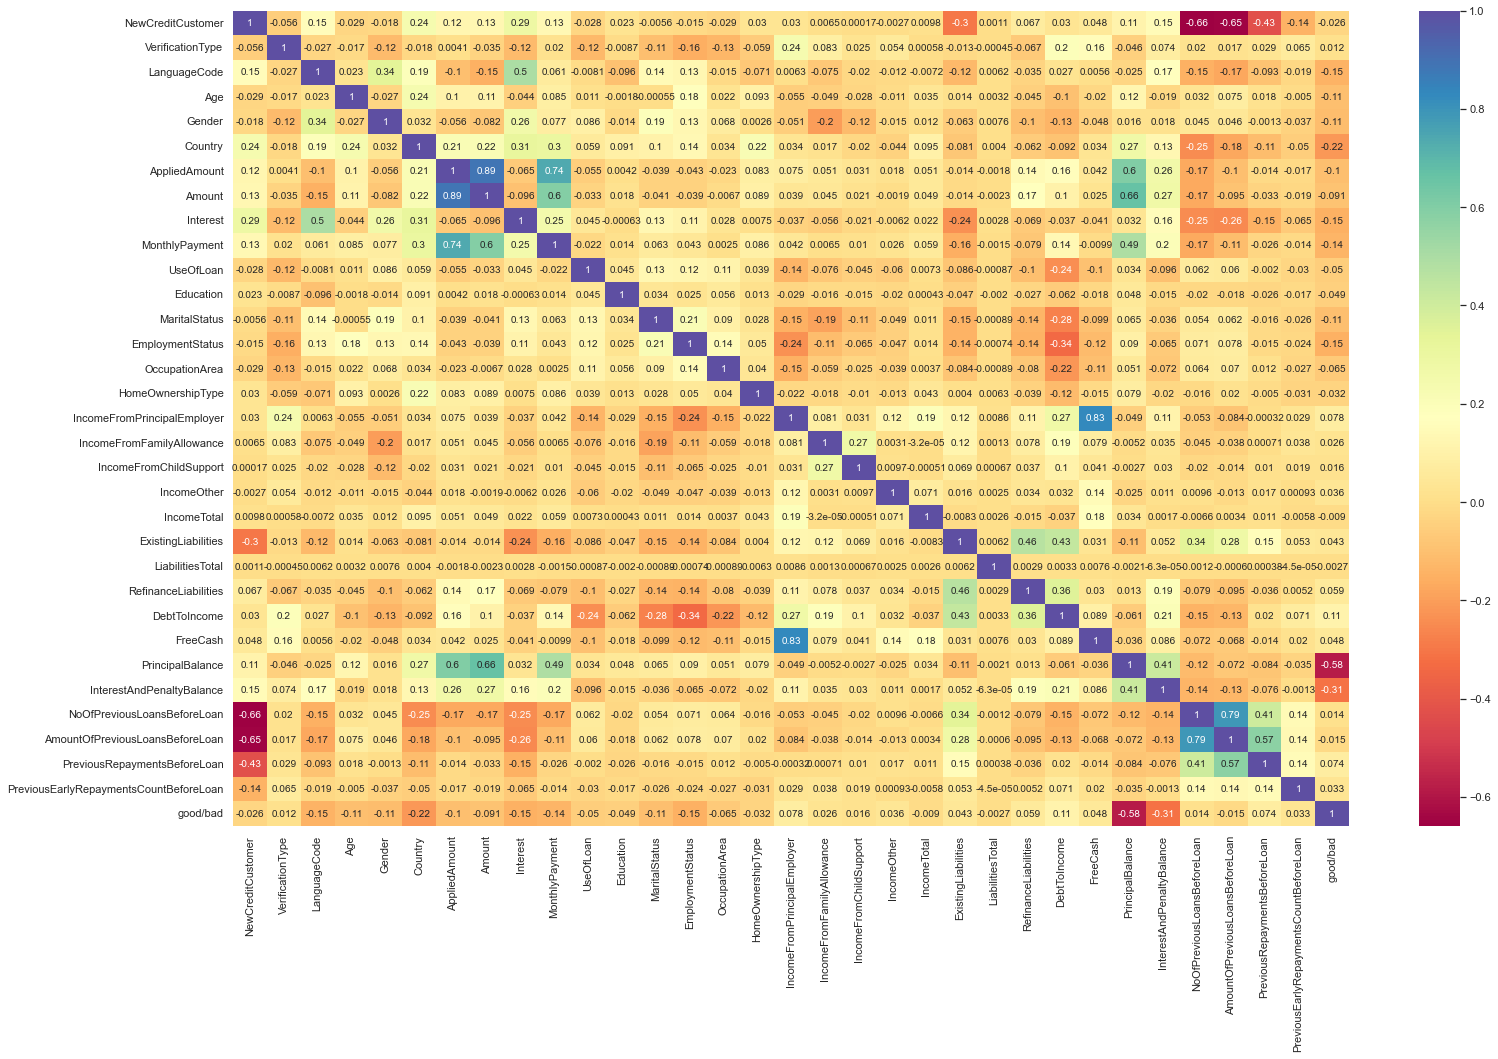

In [27]:
plt.figure(figsize=(25,15))
dataplot = sns.heatmap(data.corr(),cmap="Spectral" , annot=True)

# split the data

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x = data.drop('good/bad',axis=1)
y = data['good/bad']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [32]:
x_train.shape

(64348, 32)

In [54]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [107]:
scaled_data = scaler.transform(data)

In [108]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA(n_components = 2)

In [110]:
pca.fit(scaled_data)

PCA(n_components=2)

In [111]:
x_pca = pca.transform(scaled_data)

In [112]:
scaled_data.shape

(75704, 27)

In [113]:
x_pca.shape

(75704, 2)

Text(0, 0.5, 'Second principal component')

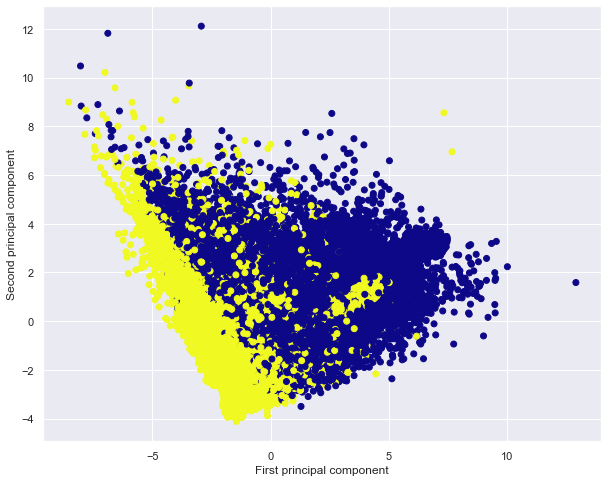

In [114]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [52]:
data.to_csv("bondora_to_model.csv", index= False)